<h1 style='text-align:center;'> Feature Engineering </h1>

For data to be modeled using Machine Learning Models, they need to be presented in a numerical format. This notebook provides a summary of how to convert different types of data into numerical feature matrix. This feature matrix can then be fead to ML model. 

#### 1. Categorical Features #### 
Say one of your features is City. A common mistake is to present each city with integers.  

For example, Toronto: 1, Vaughan: 2, London: 3, and so on. 

The problem with such approach is that the model makes the fundamental assumption that these values reflect quantities. That is London > Vaughan > Toronto. A better technique is to use **one-hot encoding**. That is:   


Toronto: [1, 0, 0]  

Vaughan: [0, 1, 0]

London: [0, 0, 1]  

Will also show examples on using:  

**sklearn.preprocessing OneHotEncoder** 

**sklearn.feature_extraction FeatureHasher**

In [2]:
data = [
    {'price': 85000, 'rooms': 4, 'city': 'Toronto'},
    {'price': 70000, 'rooms': 3, 'city': 'Vaughan'},
    {'price': 65000, 'rooms': 3, 'city': 'London'},
    {'price': 60000, 'rooms': 2, 'city': 'Windsor'},

]

**2.A) DictVectorizer**

In [4]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer( sparse=False, dtype=int) # instantiating 


In [7]:
vec.fit_transform(data) # now transforming the data

array([[    0,     1,     0,     0, 85000,     4],
       [    0,     0,     1,     0, 70000,     3],
       [    1,     0,     0,     0, 65000,     3],
       [    0,     0,     0,     1, 60000,     2]])

In [9]:
vec.get_feature_names_out()

array(['city=London', 'city=Toronto', 'city=Vaughan', 'city=Windsor',
       'price', 'rooms'], dtype=object)

In [10]:
vec2 = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

array([[    0,     1,     0,     0, 85000,     4],
       [    0,     0,     1,     0, 70000,     3],
       [    1,     0,     0,     0, 65000,     3],
       [    0,     0,     0,     1, 60000,     2]])

***

**1.B)   sklearn.preprocessing.OneHotEncoder**

In [11]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [12]:
colors = np.array([
    ['Red'],
    ['Green'],
    ['Blue'],
    ['Yellow'],
    ['Black'],
    ['Purple']
])

In [14]:
encoder = OneHotEncoder(sparse=False)

In [15]:
encoder.fit_transform(colors)

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

**sparse=True is more memory efficient for large datasets with many categorical variables, especially when the encoded result contains many zeros**

***

#### 1. C)  FeatureHasher####
The FeatureHasher in scikit-learn is used to convert a collection of text documents to a matrix of token occurrences, but it does so using a hashing trick. This is particularly useful for high-dimensional categorical data where the number of unique categories is very large. The FeatureHasher is memory efficient and can handle new categories that it has not seen during training.

**sklearn.feature_extraction.FeatureHasher**

In [20]:
from sklearn.feature_extraction import FeatureHasher

In [21]:
data = [
    {'feature1': 'dog', 'feature2': 'cat'},
    {'feature1': 'mouse', 'feature2': 'dog'},
    {'feature1': 'cat', 'feature2': 'mouse'},
]

In [22]:
hasher = FeatureHasher(n_features=10, input_type='dict')

In [24]:
hashed_features = hasher.transform(data)

In [25]:
hashed_features

<3x10 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [26]:
print("Hashed Features (sparse matrix):\n", hashed_features)
print("Hashed Features (dense array):\n", hashed_features.toarray())

Hashed Features (sparse matrix):
   (0, 0)	1.0
  (0, 9)	1.0
  (1, 1)	-1.0
  (1, 9)	-1.0
  (2, 0)	-1.0
  (2, 5)	-1.0
Hashed Features (dense array):
 [[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.]]


***

#### 2. Text Features ####

Converts text to a set fo representative numerical values.

In [28]:
Samples = ['problem of evil', 'evil queen', 'horizon problem']

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
vec = CountVectorizer() 
x= vec.fit_transform(Samples)

In [35]:
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [36]:
print('x', x)

x   (0, 3)	1
  (0, 2)	1
  (0, 0)	1
  (1, 0)	1
  (1, 4)	1
  (2, 3)	1
  (2, 1)	1


The result is a sparse matrix recording the number of times each word appears 

In [38]:
import pandas as pd

In [39]:
pd.DataFrame(x.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


<span style='color:red'>Problem with using simple raw word counts is it can lead to features that put too much weihgt on words that appear very frequently. To fix this, TF-IDF: term frequency-inverse documnet frequency </span>

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [42]:
vec2= TfidfVectorizer()
X=vec.fit_transform(Samples)

In [43]:
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


#### 3. Derived Features ### 
Ex. constructing polynomial features from input data 

In [45]:
%matplotlib inline

In [46]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'polynomial')

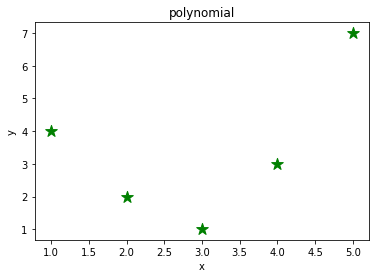

In [53]:
x= np.array([1, 2,3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y, marker='*', c='g', s=150)
plt.xlabel('x')
plt.ylabel('y')
plt.title('polynomial')

In [55]:
from sklearn.linear_model import LinearRegression
X=x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit= model.predict(X)

Text(3, 6, 'bad linear fit')

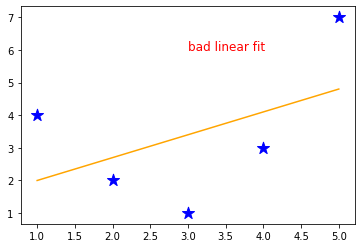

In [65]:
plt.scatter(x,y, marker='*', c='b', s=160)
plt.plot(x, yfit, c='orange')
plt.text(3, 6, 'bad linear fit', fontsize='large', c='red')

In [66]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures( degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


column one repsenting x, column 2 represeing x^2, and column 3 representing x^3

**Now we can use linear Regression to fit the transformed values**

Text(1, 6, 'Better fit using LinearRegression')

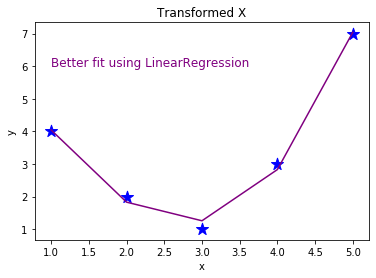

In [69]:
model = LinearRegression().fit(X2, y)
yfit=model.predict(X2)
plt.scatter(x,y, c='b', s=160, marker='*')
plt.plot(x,yfit, c='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Transformed X')
plt.text(1, 6, 'Better fit using LinearRegression', fontsize='large', c='purple')
    

#### 4. Imputing Missing Data ### 

In [ ]:
from sklearn.impute import SimpleImputer
imp = SipmleImputer(strategy='mean')
imputed_data = imp.fit_transform(raw_data)

#### 5. Image Features###
More about it in deep neural networks  



### Feature Pipelines ### 

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(Imputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

In [ ]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))